In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,export_graphviz
import graphviz
import dtreeviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import tree
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 决策树保存路径
model_path = r"D:\ArcgisData\pred_tl\pred_moudle\tree"
model_name = "tree_acc.pkl"

In [3]:
dataset = pd.read_csv('../../../data/csv_file/feature_table_result.csv')
dataset.dropna(inplace=True)
dataset.columns


Index(['亚类', '土属', '土种', '土类', 'DEM', 'TWI5', 'TPI201', 'TPI101', 'TPI11',
       'TPI3', 'TMP', 'SOILQS', 'SLOP', 'PRE', 'NIGTH', 'NDVI', 'CUR', 'ASP',
       'PLCUR', 'POCUR', 'LON', 'LAT', 'PH', 'DL', 'SC', 'SC2', 'OSJL', 'SOM',
       'DZ'],
      dtype='object')

In [4]:
dataset["SC2_label"] = dataset.SC2.astype("category").cat.codes
dataset["DL_label"] = dataset.DL.astype("category").cat.codes
dataset["DZ_label"] = dataset.DZ.astype("category").cat.codes
dataset["TL_label"] = dataset.土类.astype("category").cat.codes


In [5]:
result = dataset.groupby('TL_label')["土类"].apply(lambda x: list(x.unique())).to_dict()
result

{0: ['水稻土'], 1: ['石灰土'], 2: ['紫色土'], 3: ['黄壤'], 4: ['黄棕壤']}

In [6]:
features = ['DEM', 'TWI5', 'TPI201', 'TMP','SLOP', 'PRE', 'NIGTH', 'NDVI','PH', 'SOM', 'SC2_label', 'DL_label', 'DZ_label']
target = "TL_label"

In [7]:
X = dataset[features]
y = dataset[target]
# 分割训练集和测试集
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 通过网格搜索找到最优超参数
params = {'criterion':['gini','entropy'], 'max_depth':list(range(2,100))} 
grid_tree = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid_tree.fit(Xtrain, ytrain)
print(grid_tree.best_params_)

{'criterion': 'gini', 'max_depth': 5}


In [9]:

random_state = 42
tree_classifier = DecisionTreeClassifier(random_state=42,**grid_tree.best_params_)
tree_classifier.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [10]:
# 保存模型
with open(os.path.join(model_path,model_name), 'wb') as f:
    pickle.dump(tree_classifier, f)
    
# 加载模型
with open(os.path.join(model_path,model_name), 'rb') as f:
    predictor = pickle.load(f)

In [11]:
# 查看准确率
y_test_pred= predictor.predict(Xtest)
y_train_pred = predictor.predict(Xtrain)
accuracy_test = accuracy_score(ytest,y_test_pred)
accuracy_train = accuracy_score(ytrain,y_train_pred)
print(accuracy_train,accuracy_test)

0.9103903243540407 0.9054945054945055


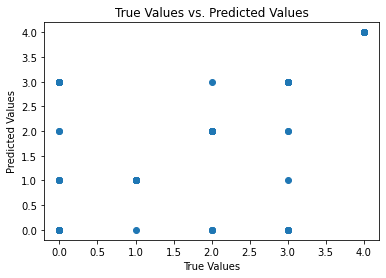

In [17]:
# 预测散点图
plt.scatter(ytest.values, y_test_pred)

# 添加标签和标题
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')

# 显示图表
plt.show()

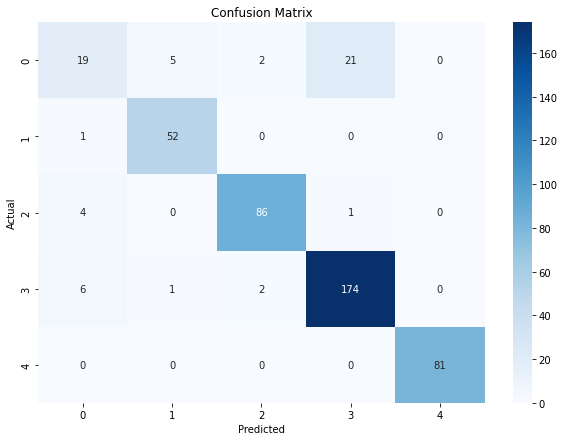

In [22]:
# 绘制混淆矩阵
cm = confusion_matrix(ytest, y_test_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

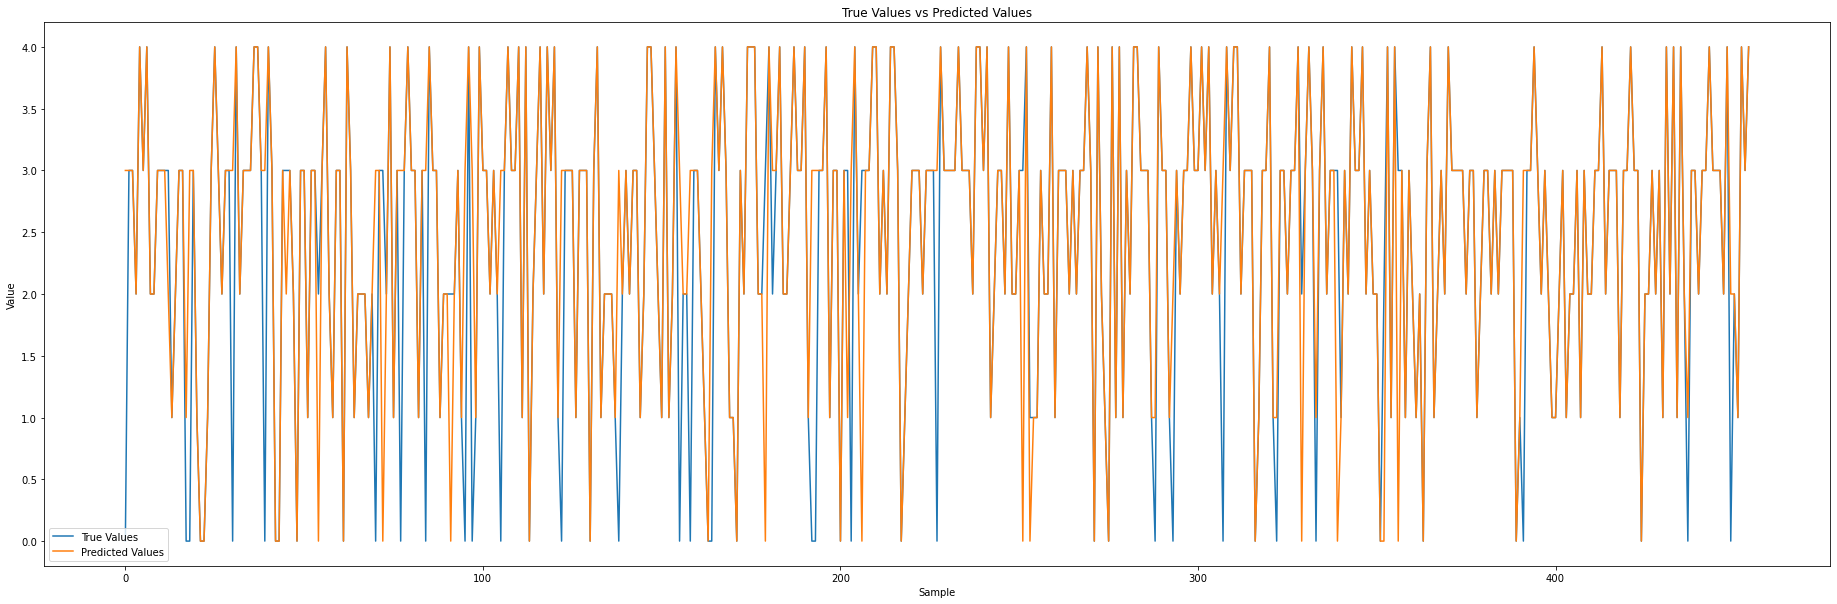

In [21]:
# 创建折线图
plt.figure(figsize=(32,10))
plt.plot(ytest.values, label='True Values')
plt.plot(y_test_pred, label='Predicted Values')

# 图表标题和标签
plt.title('True Values vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Value')

# 添加图例
plt.legend()

# 显示图表
plt.show()

In [14]:
# 剪枝

In [42]:
viz_model = dtreeviz.model(predictor,
                           X_train=Xtrain, y_train=ytrain,
                           feature_names=features,
                           target_name=target, class_names=["SDT", "SHT","ZST","HR","HZR"])

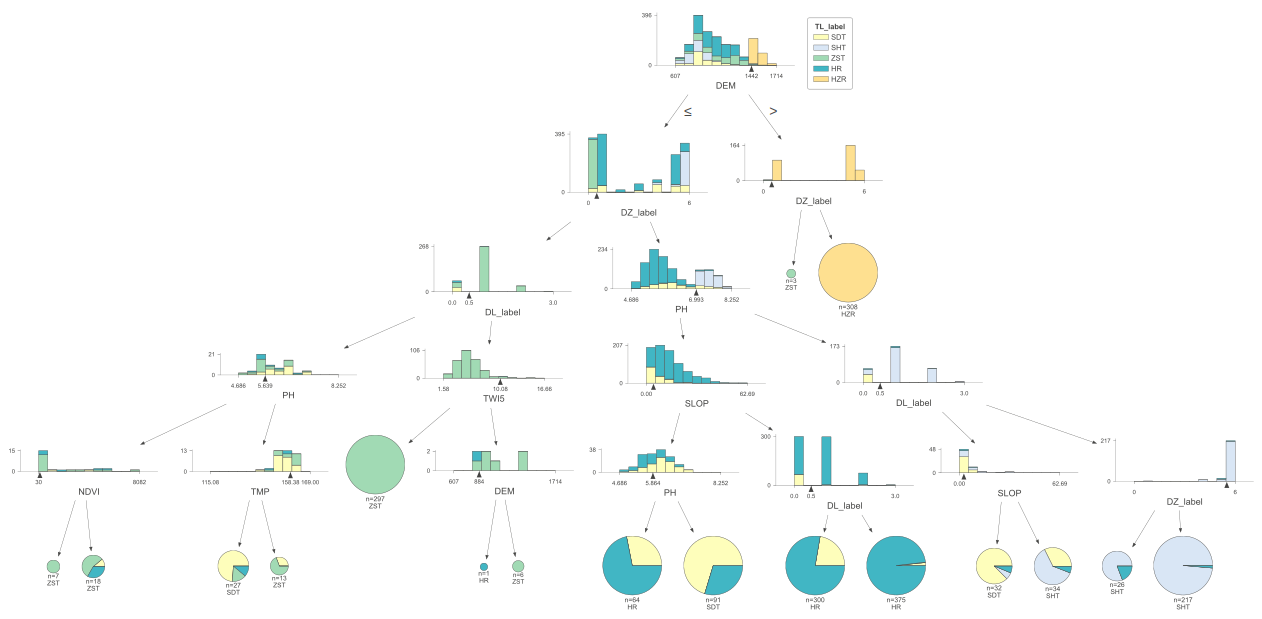

In [44]:
viz_model.view()

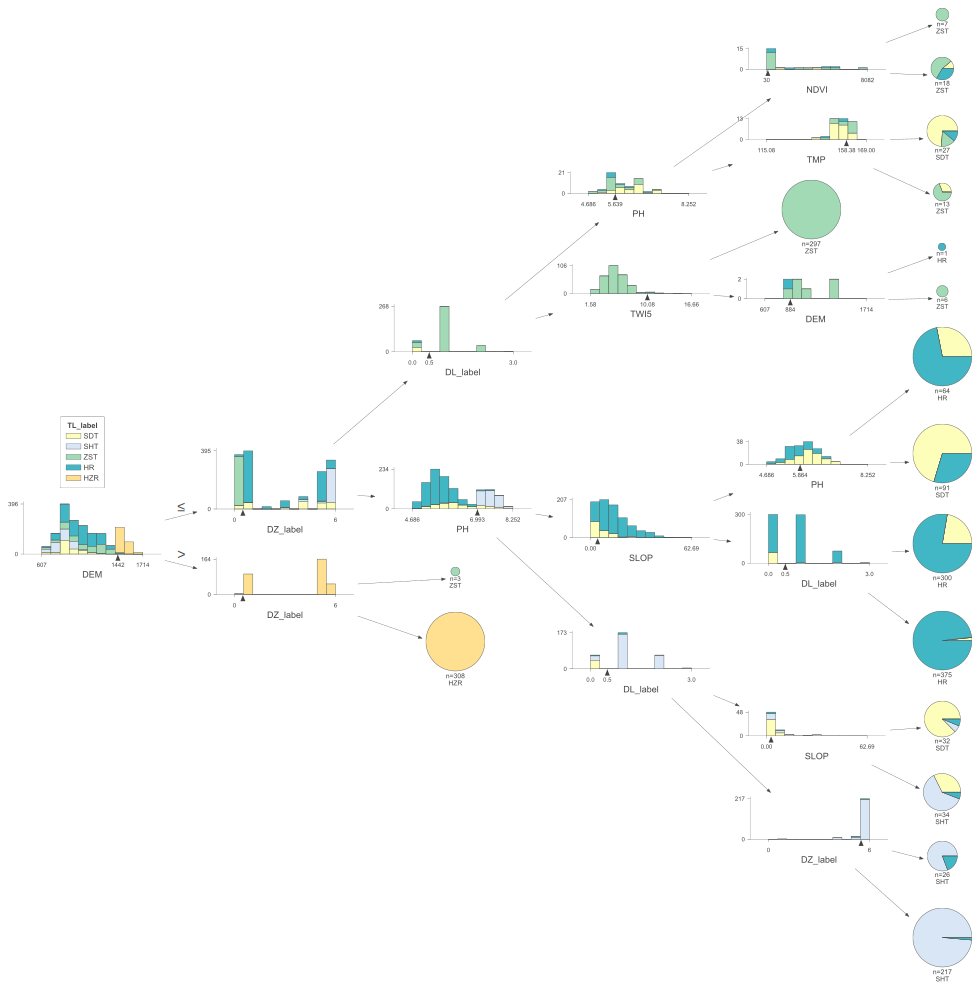

In [45]:
viz_model.view(orientation="LR")

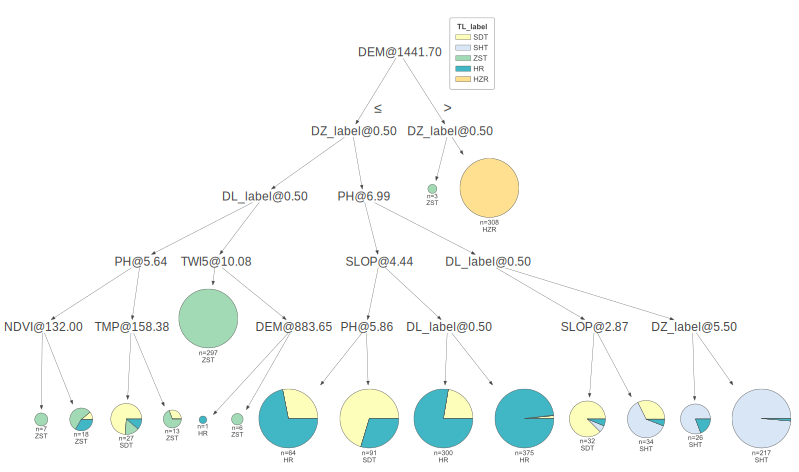

In [46]:
viz_model.view(fancy=False)